$Tiro ~ parabolico$

El movimiento que sigue una pelota lanzada en cualquier dirección esta dada por la solución de la ecuación diferencial resultante de un analizis de fuerzas sobre el objeto, en la cual para el presente trabajo se introduce la fuerza de arrastre(resistencia al movimiento por rozamiento) lineal($f=c V$) y cuadratica ($f= c V^2$)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import linspace

In [2]:
# metodo de euler convencional para la solucion de la ecuacion diferencial
def euler(g,Vo,Yo,tmin,tmax,Deltat,fun):
    N = (tmax - tmin)/Deltat
    t = linspace(tmin,tmax,int(N))
    v = np.zeros(len(t)) 
    y = np.zeros(len(t))
    y[0] = Yo
    v[0] = Vo
    for i in range(len(t)-1):
        V = v[i]
        acel = float(eval(fun))
        v[i+1] = v[i] + Deltat*acel
        y[i+1] = y[i] + Deltat*v[i]
    return(t,y,v)

distancia  maxima: 22.959184


C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


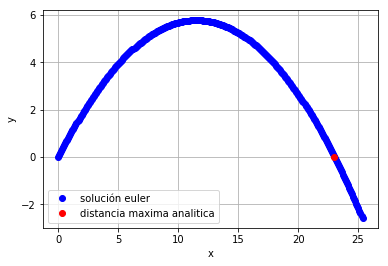

In [3]:
# ecuaciones tiro parabolico sin arrastre
# m(dvx/dt) = 0
# m(dvy/dt) = -mg

g = 9.8 #m/s2
Vo = 15 #m/s
theta = 45*(np.pi/180) # angulo de lanzamiento radianes
m = 1 #kg

Vx = Vo*np.cos(theta) # velocidad inicial en direccion x m/S
Vy = Vo*np.sin(theta) # velocidad inicial en direccion y m/s
# posicion inical(marco de referencia absoluto)
Xo = 0 #mts
Yo = 0 # mts

tmin = 0 # seg
tmax = 2.4 # seg
N = 300
Deltat = (tmax-tmin)/N # seg

funx = '0'
funy = '-g'

(t,x,vx)=euler(g,Vx,Xo,tmin,tmax,Deltat,funx)# solucion en x
(t,y,vy)=euler(g,Vy,Yo,tmin,tmax,Deltat,funy)# solucion en y

Xmax = (Vo**2)/g # distancia maxima en x
print('distancia  maxima: %f' %(Xmax))

plt.plot(x,y,'bo',label = 'solución euler')
plt.plot(Xmax,0,'ro',label = 'distancia maxima analitica')
plt.grid("on")
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

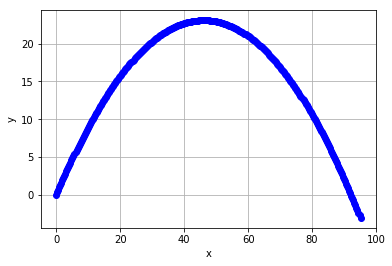

In [4]:
# ecuaciones tiro parabolico sin arrastre para un avelocidad inicial diferente
# m(dvx/dt) = 0
# m(dvy/dt) = -mg
g = 9.8 #m/s2
Vo = 30 #m/s
theta = 45*(np.pi/180)
m = 1 #kg
Vx = Vo*np.cos(theta)
Vy = Vo*np.sin(theta)
Xo = 0
Yo = 0
tmin = 0
tmax = 4.5
N = 300
Deltat = (tmax-tmin)/N
funx = '0'
funy = '-g'
(t,x1,vx)=euler(g,Vx,Xo,tmin,tmax,Deltat,funx)
(t,y1,vy)=euler(g,Vy,Yo,tmin,tmax,Deltat,funy)
#print(x,y)
plt.plot(x1,y1,'bo')
plt.ylabel('y')
plt.xlabel('x')
plt.grid("on")

La distancia máxima en x del movimiento del objeto podemos encontrarla hallando el punto extremal de la función
que define la posición de x respecto al ángulo de lanzamiento independiente del tiempo, en donde el resultado
da cuenta del ángulo para el cual la distancia es un máximo

para $X = X_o + cos(\theta)t$, $Y = Y_o + sen(\theta)t -\frac{1}{2}gt^2$,el angulo que satisface que x es maximo es
$\theta  = cos^{-1}(\sqrt{\frac{4*Yo+k}{2(2Yo+k)}}$, donde k esta dado por $2\frac{Vo^2}{g}$

distancia maxima: 94.202205, theta: 45.500000°
angulo maximo analitico: 44.389364


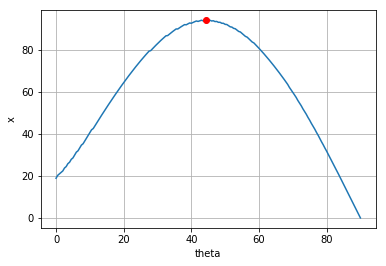

In [5]:
# para que theta x es xmax
# ecuaciones tiro parabolico
# m(dvx/dt) = 0
# m(dvy/dt) = -mg

g = 9.8 #m/s2
Vo = 30 #m/s
theta = 45*(np.pi/180)
m = 1 #kg

Vx = Vo*np.cos(theta)
Vy = Vo*np.sin(theta)

Xo = 0
Yo = 2
tmin = 0
tmax = 7
N = 300
Deltat = (tmax-tmin)/N

funx = '0'
funy = '-g'

aux2 = 0 # maximo x
aux3 = 0 # guarda el angulo para xmax
angulo = []
distmax = []
for i in range(181):
    theta = 0.5*i*(np.pi/180)
    angulo.append(theta*180/np.pi)
    Vx = Vo*np.cos(theta)
    Vy = Vo*np.sin(theta)
    (t,x,vx)=euler(g,Vx,Xo,tmin,tmax,Deltat,funx)
    (t,y,vy)=euler(g,Vy,Yo,tmin,tmax,Deltat,funy)
    aux1 = 0 #cambio de signo en y
    for j in range(len(y)):
        if aux1 > y[j]:
            aux1 = j-1
            xmax = x[aux1]
            distmax.append(xmax)
            aux1 = 0
            if aux2 < xmax:
                aux2 = xmax
                aux3 = theta*180/np.pi
                break
            break

print('distancia maxima: %f, theta: %f°' % (aux2,aux3))
plt.plot(angulo,distmax)

#angulo para xmax analitico
k = 2*(Vo**2)/g
thetamax = np.arccos(np.sqrt(4*Yo+k)/np.sqrt(2*(2*Yo+k)))*180/np.pi
plt.plot(thetamax,aux2,'ro')
print('angulo maximo analitico: %f' %(thetamax))

plt.ylabel('x')
plt.xlabel('theta')
plt.grid("on")

In [6]:
# metodo de euler convencional para la solucion de la ecuacion diferencial con arrastre
def euler2(g,c,m,Vox,Voy,Xo,Yo,tmin,tmax,Deltat,funx,funy):
    N = (tmax - tmin)/Deltat
    t = linspace(tmin,tmax,int(N))
    vx = np.zeros(len(t))
    vy = np.zeros(len(t))
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = Xo
    y[0] = Yo
    vx[0] = Vox
    vy[0] = Voy
    for i in range(len(t)-1):
        Vx = vx[i]
        Vy = vy[i]
        acel1 = float(eval(funx))
        acel2 = float(eval(funy))
        vx[i+1] = vx[i] + Deltat*acel1
        vy[i+1] = vy[i] + Deltat*acel2
        x[i+1] = x[i] + Deltat*vx[i]
        y[i+1] = y[i] + Deltat*vy[i]
    return(t,x,y,vx,vy)

In [7]:
# ecuaciones tiro parabolico con arrastre cuadratico
# m(dvx/dt) = -c sqrt(vx2+vy2)vx
# m(dvy/dt) = -c sqrt(vx2+vy2)vy -mg

c = 0.05
m = 7 # kg
g = 9.8 #m/s2
Vo = 30 #m/s
theta = 45*(np.pi/180)
m = 1 #kg

Vx = Vo*np.cos(theta)
Vy = Vo*np.sin(theta)

Xo = 0
Yo = 0
tmin = 0
tmax = 4.5
N = 300
Deltat = (tmax-tmin)/N

funx = '-c*((Vx**2+Vy**2)**0.5)*Vx/m'
funy = '-(c*((Vx**2+Vy**2)**0.5)*Vy/m)-g'

(tr,xr,yr,vxr,vyr)=euler2(g,c,m,Vx,Vy,Xo,Yo,tmin,tmax,Deltat,funx,funy)

In [8]:
# ecuaciones tiro parabolico con arrastre lineal
# m(dvx/dt) = -vx
# m(dvy/dt) = -cVy -mg

c = 0.05
m = 7 # kg
g = 9.8 #m/s2
Vo = 30 #m/s
theta = 45*(np.pi/180)
m = 1 #kg

Vx = Vo*np.cos(theta)
Vy = Vo*np.sin(theta)

Xo = 0
Yo = 0
tmin = 0
tmax = 4.5
N = 300
Deltat = (tmax-tmin)/N

funx = '-c*Vx/m'
funy = '-(c*Vy/m)-g'

(tr,xr2,yr2,vxr2,vyr2)=euler2(g,c,m,Vx,Vy,Xo,Yo,tmin,tmax,Deltat,funx,funy)

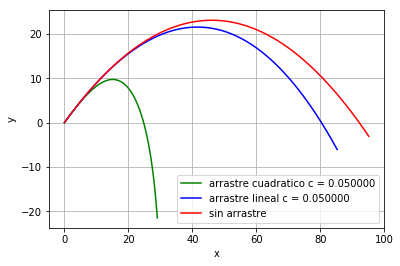

In [10]:
plt.plot(xr,yr,'g',label='arrastre cuadratico c = %f' %(c))
plt.plot(xr2,yr2,'b',label='arrastre lineal c = %f' %(c))
plt.plot(x1,y1,'r',label='sin arrastre')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.grid("on")